ya karena saya pusing ya fren, jadi bikin satu file lagi (:

In [1]:
import pandas as pd
import numpy as n
import matplotlib.pyplot as p

In [19]:
df=pd.read_csv('scores.csv', comment='#', escapechar='\t')

df.rename(columns=lambda x: x.strip('\t ') if isinstance(x, str) else x, inplace=True)
df['city'] = df['city'].str.lstrip()
for col in df.columns:
    df[col] = df[col].apply(lambda x: x.strip('\t')if isinstance(x, str) else x)
    df[col] = df[col].apply(lambda x: x.lstrip() if isinstance(x, str) else x)
df

,week,day,month,year,home,hscore,hmatch,hpoint,htotal,away,ascore,amatch,apoint,atotal,stadium,city
0,1,1,7,2023,Bali United FC,0,1,0,0,PSS Sleman,1,1,3,3,Kapten I Wayan Dipta,Gianyar
1,1,1,7,2023,Persis Solo,2,1,0,0,Persebaya Surabaya,3,1,3,3,Manahan,Solo
2,1,2,7,2023,Persib Bandung,1,1,1,1,Madura United FC,1,1,1,1,Gelora Bandung Lautan Api,Bandung
3,1,2,7,2023,Dewa United FC,1,1,3,3,Arema FC,0,1,0,0,Indomilk Arena,Tangerang
4,1,2,7,2023,PS Barito Putera,2,1,3,3,Persita Tangerang,0,1,0,0,Demang Lehman,Martapura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,9,19,8,2023,Rans Nusantara FC,0,5,1,16,Dewa United FC,0,5,1,12,Maguwoharjo,Sleman
77,9,19,8,2023,PS Barito Putera,2,5,3,17,Persik Kediri,0,5,0,11,Demang Lehman,Martapura
78,9,19,8,2023,Persis Solo,3,5,3,12,Bali United FC,1,4,0,14,Manahan,Solo
79,9,20,8,2023,Persija Jakarta,2,5,1,13,Arema FC,2,5,1,3,Patriot Chandra Bhaga,Bekasi


In [3]:
# di-run buat keterangan aja
ket = open('scores.csv', 'r').readlines()
ket[-1]

'#home total = total points (cumulative) earned in total for team in home column'

# tables at certain gameweek

In [4]:
club = df['home'].unique()
club

array(['Bali United FC', 'Persis Solo', 'Persib Bandung',
       'Dewa United FC', 'PS Barito Putera', 'Rans Nusantara FC',
       'Persik Kediri', 'PSIS Semarang', 'Persija Jakarta', 'PSS Sleman',
       'Arema FC', 'Persebaya Surabaya', 'PSM Makassar',
       'Persita Tangerang', 'Borneo FC Samarinda', 'Madura United FC',
       'Bhayangkara FC', 'Persikabo 1973'], dtype=object)

In [20]:
points = []
hgf=[]
agf=[]
hga=[]
aga=[]
win=[]
draw=[]
lose=[]
played=[]
pekanke=9 # PEKAN KE
for cl in club:
    hora = df.loc[ ( (df.home.str.contains(cl)) | (df.away.str.contains(cl)) ) & (df['week']==pekanke) ]
    
    hgf.append(df.loc[df.home.str.contains(cl)]['hscore'].sum()) #goal for
    agf.append(df.loc[df.away.str.contains(cl)]['ascore'].sum())
    hga.append(df.loc[df.home.str.contains(cl)]['ascore'].sum()) #goal against
    aga.append(df.loc[df.away.str.contains(cl)]['hscore'].sum())
    
    win.append(df[((df['home'] == cl) & (df['hpoint'] == 3)) | ((df['away'] == cl) & (df['apoint'] == 3))].shape[0])
    draw.append(df[((df['home'] == cl) & (df['hpoint'] == 1)) | ((df['away'] == cl) & (df['apoint'] == 1))].shape[0])
    lose.append(df[((df['home'] == cl) & (df['hpoint'] == 0)) | ((df['away'] == cl) & (df['apoint'] == 0))].shape[0])
    
    try:
        if hora.home.str.contains(cl).item():
            points.append(hora['htotal'].values[0])
        else:
            points.append(hora['atotal'].values[0])
        played.append(pekanke)
    except:
        hora = df.loc[ ( (df.home.str.contains(cl)) | (df.away.str.contains(cl)) ) & (df['week']==pekanke-1) ]
        if hora.home.str.contains(cl).item():
            points.append(hora['htotal'].values[0])
        else:
            points.append(hora['atotal'].values[0])
        played.append(pekanke-1)
points

[14, 12, 11, 12, 17, 16, 11, 14, 13, 15, 3, 14, 11, 10, 16, 19, 4, 8]

## home-away pairs

In [21]:
dff=df.groupby(["home","away"]).agg({'hscore':['max'],'ascore':['max'],
                                     'hpoint':['max'],'apoint':['max']})
dff.columns=dff.columns.droplevel(1)
dff

hscore  ascore  hpoint  apoint
home              away                                             
Arema FC          Bali United FC          1       3       0       3
                  PS Barito Putera        0       4       0       3
                  Persib Bandung          3       3       1       1
                  Rans Nusantara FC       0       1       0       3
Bali United FC    Dewa United FC          3       1       3       0
...                                     ...     ...     ...     ...
Rans Nusantara FC Dewa United FC          0       0       1       1
                  Madura United FC        3       1       3       0
                  PSS Sleman              0       0       1       1
                  Persikabo 1973          2       1       3       0
                  Persita Tangerang       0       1       0       3

[81 rows x 4 columns]

## tables

In [22]:
tables = pd.DataFrame ({"Clubs": club, "Played":played, "Won":win, "Drawn":draw, "Lost":lose, 
                        "GF":[h + a for h, a in zip(hgf, agf)], "GA":[h + a for h, a in zip(hga, aga)], 
                        "Points": points})

tables.insert(len(tables.columns)-1, "GD", (tables['GF']-tables['GA']))

# Convert club names to lowercase before sorting bikinan chatgpt tapi solutip
tables["Clubs_lower"] = tables["Clubs"].str.lower()

# Sort the dataframe + indexing
tables=tables.sort_values(by=['Points','GD','GF','Clubs_lower'], ascending=[False,False,False,True]).reset_index(drop=True)
tables.index=tables.index + 1

# Drop the temporary "Clubs_lower" column
tables.drop(columns=["Clubs_lower"], inplace=True)

tables

,Clubs,Played,Won,Drawn,Lost,GF,GA,GD,Points
1,Madura United FC,9,6,1,2,18,12,6,19
2,PS Barito Putera,9,5,2,2,17,8,9,17
3,Borneo FC Samarinda,9,4,4,1,14,9,5,16
4,Rans Nusantara FC,9,4,4,1,11,7,4,16
5,PSS Sleman,9,4,3,2,16,15,1,15
6,PSIS Semarang,9,4,2,3,14,9,5,14
7,Bali United FC,9,4,2,3,14,13,1,14
8,Persebaya Surabaya,9,4,2,3,11,11,0,14
9,Persija Jakarta,9,3,4,2,12,9,3,13
10,Persis Solo,9,3,3,3,15,15,0,12


## sort head-to-head points

In [23]:
# another dataframe
pridx=n.array((range(18,0,-1)))
sh = tables[['Clubs','Points']]
sh.insert(2,'pr',pridx)
sh

,Clubs,Points,pr
1,Madura United FC,19,18
2,PS Barito Putera,17,17
3,Borneo FC Samarinda,16,16
4,Rans Nusantara FC,16,15
5,PSS Sleman,15,14
6,PSIS Semarang,14,13
7,Bali United FC,14,12
8,Persebaya Surabaya,14,11
9,Persija Jakarta,13,10
10,Persis Solo,12,9


In [24]:
pridx=n.array((range(18,0,-1)))
sh = tables[['Clubs','Points']]
sh.insert(2,'pr',pridx)
sh

for i in range (1,len(sh)+1,1):
    
    try:
        sh['Points'][i]==sh['Points'][i+1]
        
        if sh['Points'][i]==sh['Points'][i+1]:
            
            h1=dff.index.get_level_values('home')==sh['Clubs'][i]
            a2=dff.index.get_level_values('away')==sh['Clubs'][i+1]
            h2=dff.index.get_level_values('home')==sh['Clubs'][i+1]
            a1=dff.index.get_level_values('away')==sh['Clubs'][i]
            
            i1scr=0
            i2scr=0
        
            game = dff.loc[ ((h1&a2) | (h2&a1)) ]
            
            if len(game)==1:
                
                try:
                    i1scr = dff.loc[(sh['Clubs'][i],sh['Clubs'][i+1])]['hpoint']
                    i2scr = dff.loc[(sh['Clubs'][i],sh['Clubs'][i+1])]['apoint']

                except:
                    i1scr = dff.loc[ (sh['Clubs'][i+1],sh['Clubs'][i]) ]['apoint'] 
                    i2scr = dff.loc[ (sh['Clubs'][i+1],sh['Clubs'][i]) ]['hpoint']
            
            elif len(game)==2:
                i1scr = dff.loc[[ (sh['Clubs'][i],sh['Clubs'][i+1]) ]]['hpoint'] + dff.loc[[ (sh['Clubs'][i+1],sh['Clubs'][i]) ]]['apoint']
                i2scr = dff.loc[[ (sh['Clubs'][i],sh['Clubs'][i+1]) ]]['apoint'] + dff.loc[[ (sh['Clubs'][i+1],sh['Clubs'][i]) ]]['hpoint']
                
            if i1scr < i2scr:
                sh.at[i,'pr']=sh['pr'][i]-1
                sh.at[i+1,'pr']=sh['pr'][i+1]+1
        
    except:
        pass
        
sh

,Clubs,Points,pr
1,Madura United FC,19,18
2,PS Barito Putera,17,17
3,Borneo FC Samarinda,16,16
4,Rans Nusantara FC,16,15
5,PSS Sleman,15,14
6,PSIS Semarang,14,13
7,Bali United FC,14,12
8,Persebaya Surabaya,14,11
9,Persija Jakarta,13,10
10,Persis Solo,12,9


In [25]:
sh=sh.sort_values(by='pr', ascending=False).reset_index(drop=True)
sh

,Clubs,Points,pr
0,Madura United FC,19,18
1,PS Barito Putera,17,17
2,Borneo FC Samarinda,16,16
3,Rans Nusantara FC,16,15
4,PSS Sleman,15,14
5,PSIS Semarang,14,13
6,Bali United FC,14,12
7,Persebaya Surabaya,14,11
8,Persija Jakarta,13,10
9,Persis Solo,12,9


# points earned or lost at

In [26]:
homepoints  = []
awaypoints  = []
totalpoints = []

for cl in merg['Clubs']:
    
    hpe  = df.loc[(df['home']==cl)]['hpoint'].sum()
    ape  = df.loc[(df['away']==cl)]['apoint'].sum()
    
    homepoints.append(hpe)
    awaypoints.append(ape)
    
    totalpoints.append(hpe+ape)

In [27]:
yep = pd.DataFrame({
    'Club': sh['Clubs'],
    'Home Points': homepoints,
    'Away Points': awaypoints,
    'Total Points': totalpoints,
})
yep

,Club,Home Points,Away Points,Total Points
0,Madura United FC,12,7,19
1,PS Barito Putera,12,5,17
2,Borneo FC Samarinda,10,6,16
3,Rans Nusantara FC,8,8,16
4,PSS Sleman,5,10,15
5,PSIS Semarang,10,4,14
6,Bali United FC,10,4,14
7,Persebaya Surabaya,8,6,14
8,Persija Jakarta,9,4,13
9,Persis Solo,10,2,12


In [28]:
merg = sh[['Clubs']].merge(tables, left_on="Clubs", right_on="Clubs")
merg = merg.merge(yep, left_on="Clubs", right_on="Club")
merg.drop(columns=["Club"], inplace=True)
merg.index=merg.index+1
merg

,Clubs,Played,Won,Drawn,Lost,GF,GA,GD,Points,Home Points,Away Points,Total Points
1,Madura United FC,9,6,1,2,18,12,6,19,12,7,19
2,PS Barito Putera,9,5,2,2,17,8,9,17,12,5,17
3,Borneo FC Samarinda,9,4,4,1,14,9,5,16,10,6,16
4,Rans Nusantara FC,9,4,4,1,11,7,4,16,8,8,16
5,PSS Sleman,9,4,3,2,16,15,1,15,5,10,15
6,PSIS Semarang,9,4,2,3,14,9,5,14,10,4,14
7,Bali United FC,9,4,2,3,14,13,1,14,10,4,14
8,Persebaya Surabaya,9,4,2,3,11,11,0,14,8,6,14
9,Persija Jakarta,9,3,4,2,12,9,3,13,9,4,13
10,Persis Solo,9,3,3,3,15,15,0,12,10,2,12


Text(0, 19.2, 'source: Liga Indonesia Baru')

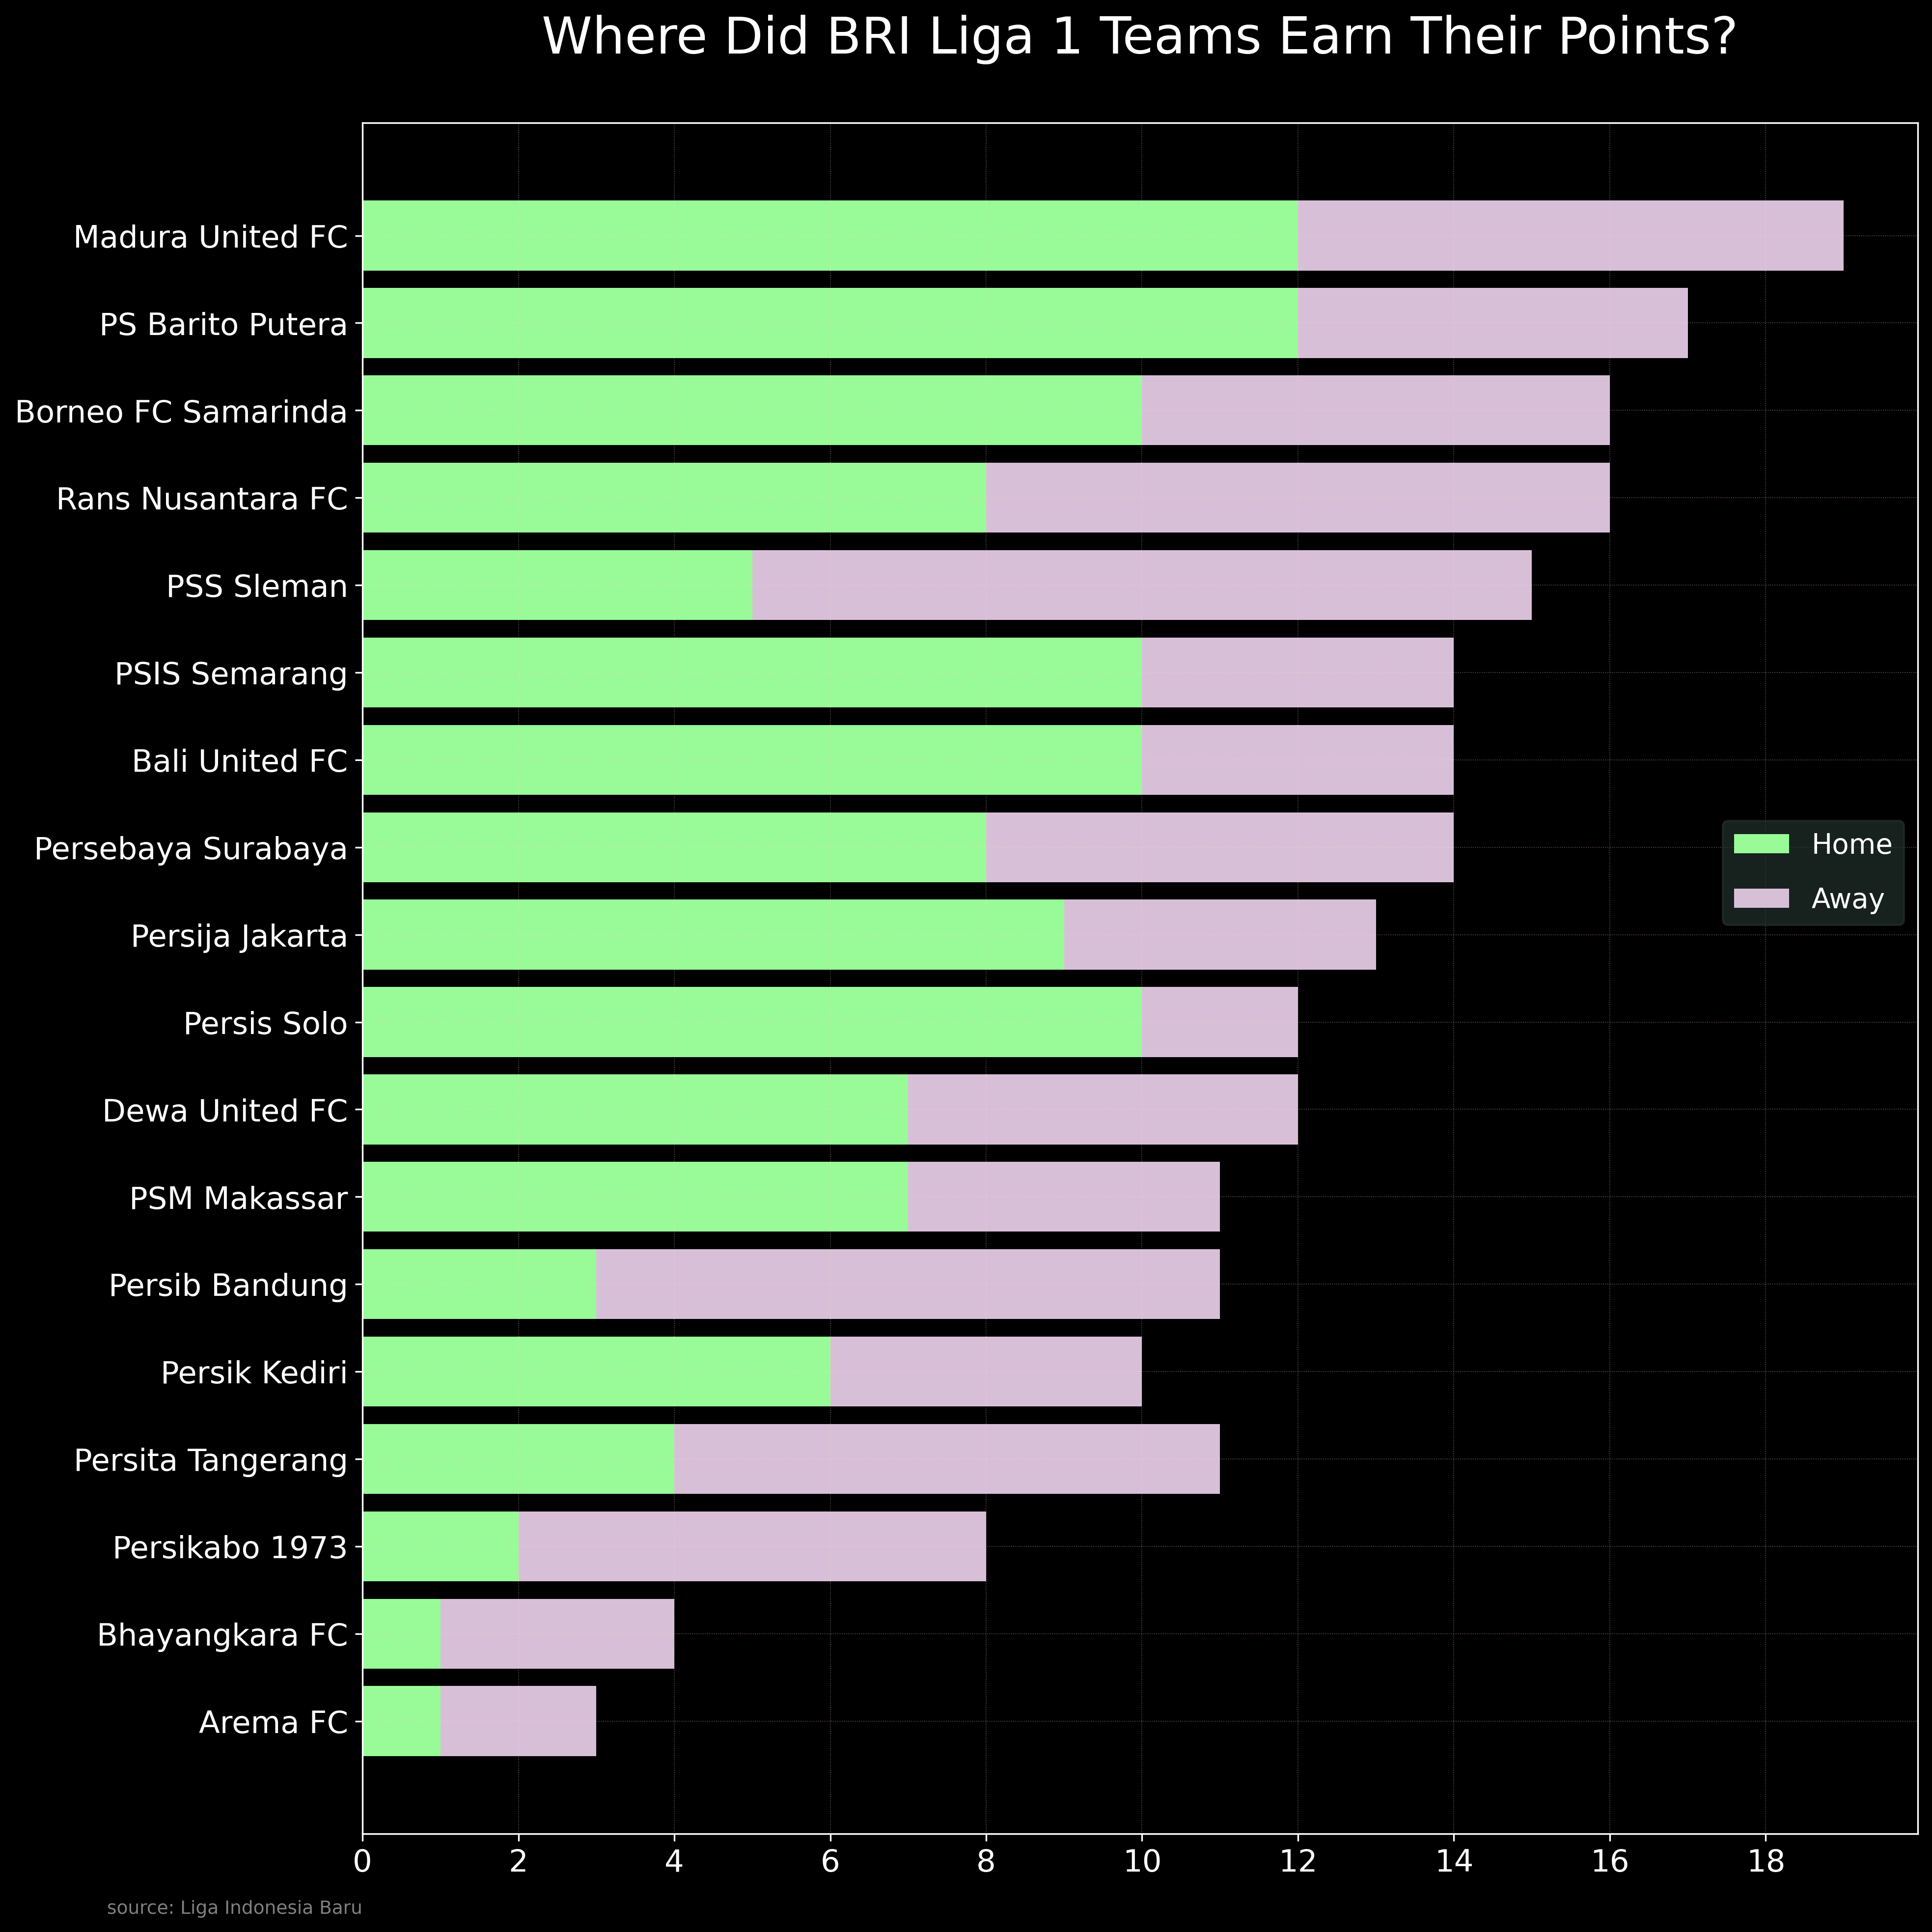

In [29]:
f1=p.figure(num=1, figsize=(13,13), dpi=300, facecolor='k', constrained_layout=True)#22312b
p.axes(facecolor='k')
p.grid(linewidth=.4, linestyle=':', alpha=.4, color='peachpuff')
p.barh(merg.Clubs, yep['Home Points'], color='palegreen', label='Home')
p.barh(merg.Clubs, yep['Away Points'], left=yep['Home Points'], color='thistle', label='Away')
p.tick_params(colors='white')
p.legend(bbox_to_anchor=(0.5, 0.1, 0.5, 0.5), #loc='lower right', 
         facecolor='#22312b', edgecolor='#22312b', #(.8,.6)
         fontsize=13.5, labelcolor='white', labelspacing=1,
         fancybox=True, framealpha=.7)
p.yticks(size=15)
p.xticks(n.arange(0,max(merg['Points']),2),size=15)
for spine in ['top', 'bottom', 'left', 'right']:
    p.gca().spines[spine].set_color('white')
p.gca().invert_yaxis()
p.title("Where Did BRI Liga 1 Teams Earn Their Points?\n", size=25, color='white')
p.text(s="source: Liga Indonesia Baru", x=0, y=19.2, ha='right', fontsize=9, color='grey')
